# Data Science Workflow Overview

### What is Data Science?

<p align = center>
<img src = 'lecture_assets/cycle.png' width = 500></img>
</p>

## Refined Data Science Cycle

1. **Problem Formulation**
   - Identify clear, stakeholder-driven questions.
   - Clarify desired outcomes and success criteria.
   - Leverage domain expertise and iterate to refine objectives.

2. **Data Collection and Assessment**
   - Acquire or identify relevant data sources aligned with the defined problem.
   - Critically evaluate data quality, quantity, potential biases, and gaps.

3. **Data Cleaning and Preprocessing**
   - Address missing values, inconsistencies, duplicates, and outliers.
   - Transform, normalize, encode, or aggregate data to prepare it for meaningful analysis.

4. **Exploratory Data Analysis (EDA)**
   - Explore patterns, relationships, and distributions using visualization and statistical summaries.
   - Develop initial hypotheses or refine existing ones.

5. **Modeling and Validation**
   - Choose and develop appropriate models (statistical, machine learning, or simulation-based).
   - Evaluate model assumptions, perform rigorous validation (e.g., cross-validation), and diagnose performance.

6. **Deployment and Communication**
   - Deploy models in a robust, reproducible, and maintainable manner.
   - Communicate insights effectively, clearly highlighting strengths, limitations, and uncertainty.
   - Provide actionable recommendations or answers to the original stakeholder-driven questions.

7. **Monitor, Iterate, and Refine**
   - Continuously monitor model performance and real-world impact.
   - Revisit earlier stages of the cycle based on feedback, new data, changing conditions, or updated stakeholder needs.

### First Example: Concrete Compressive Strength

You work for a data science consulting firm. A concrete manufacturing company wants a tool to estimate the compressive strength of different concrete mix formulations.

1. **Problem Formulation**
   - Speak with key stakeholders: chemical engineers at the company, structural engineering consultants, etc.
   - Identify which variables are under the company's control (e.g. ingredient ratios) and which are not (e.g. ambient curing conditions).
   - Assess the quantity and quality of existing data. How costly would it be to collect more if needed?
   - Determine the desired form of the tool. Do they need something simple enough for pencil-and-paper calculations, or are they envisioning a web app or software tool? The approach will differ significantly depending on the answer.

After going through this process it is determined that the company has a dataset of 1030 concrete samples.  Collecting more data would be prohibitively expensive. They want something simple enough for pencil-and-paper calculations.

NOTE:  This is a fictitious example:  I have no idea whether a pencil-and-paper tool for this task would actually be desirable.  We would need to actually be in consultation with a company to figure out what their real needs are.

2. **Data Collection and Assessment**
   - The data has already been collected and it presented to you as a `.csv` ("comma separated values") file.
   - We need to critically evaluate data quality, quantity, potential biases, and gaps.
   - We need to understand the real world meaning of all of the values.  This will require reading up on the basics of concrete composition.



In [14]:
# This line imports the pandas library and gives it the alias "pd".
# Pandas is used for working with tabular data (like spreadsheets or databases).
import pandas as pd

# NumPy is used for working with numerical data and performing mathematical operations efficiently.
import numpy as np

# matplotlib.pyplot is used for creating plots, charts, and visualizations.
import matplotlib.pyplot as plt

# Seaborn is a high-level statistical data visualization library built on Matplotlib
import seaborn as sns

We will work with the following dataset and pretend that it comes from the company we are working with:

Yeh,I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

In [15]:
with open('lecture_assets/Concrete_Readme.txt') as readme:
    print(readme.read())

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitat

3. **Data Cleaning and Preprocessing**
   - Address missing values, inconsistencies, duplicates, and outliers.
   - Transform, normalize, encode, or aggregate data to prepare it for meaningful analysis.

In [16]:
df = pd.read_csv('../../data/concrete.csv') # storing the data in a pandas DataFrame called df.

In [17]:
# Looking at the data
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


The column names are really long and contain spaces.  I will clean them up a bit.

In [18]:
df.columns = [t.partition('(')[0].strip().lower().replace(' ', '_') for t in df.columns]

In [19]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


I want to check for missing values, and also check that the type of each column is correctly specified.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


I see quite a few zeros in some of these columns.  How many are there?

In [21]:
(df == 0).sum()

cement                             0
blast_furnace_slag               471
fly_ash                          566
water                              0
superplasticizer                 379
coarse_aggregate                   0
fine_aggregate                     0
age                                0
concrete_compressive_strength      0
dtype: int64

We check in with the company to ask whether those zeros are "real zeros" or if they represent missing data, and they let us know that the zeros are "real".

4. **Exploratory Data Analysis (EDA)**
   - Explore patterns, relationships, and distributions using visualization and statistical summaries.
   - Develop initial hypotheses or refine existing ones.

Let's make histograms of all columns:

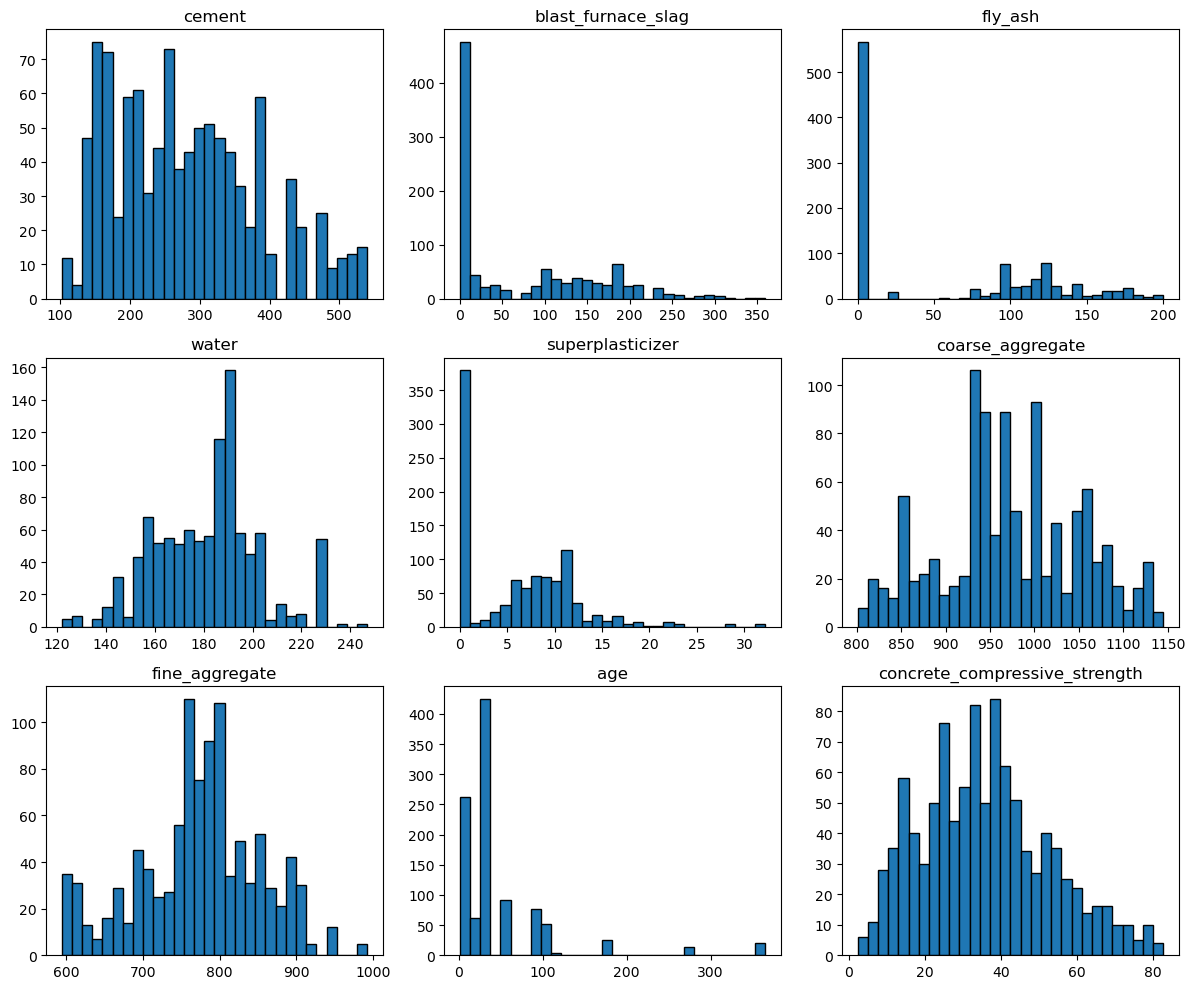

In [22]:
df.hist(bins=30, figsize=(12, 10), edgecolor='black', grid = False)
plt.tight_layout()
plt.show()

Some of the features have scant data in certain ranges.  This doesn't spell doom for our project, but it should inform how we interpret the results (especially in these regions).

Let's look at the relationship of each feature with the target using scatterplots.

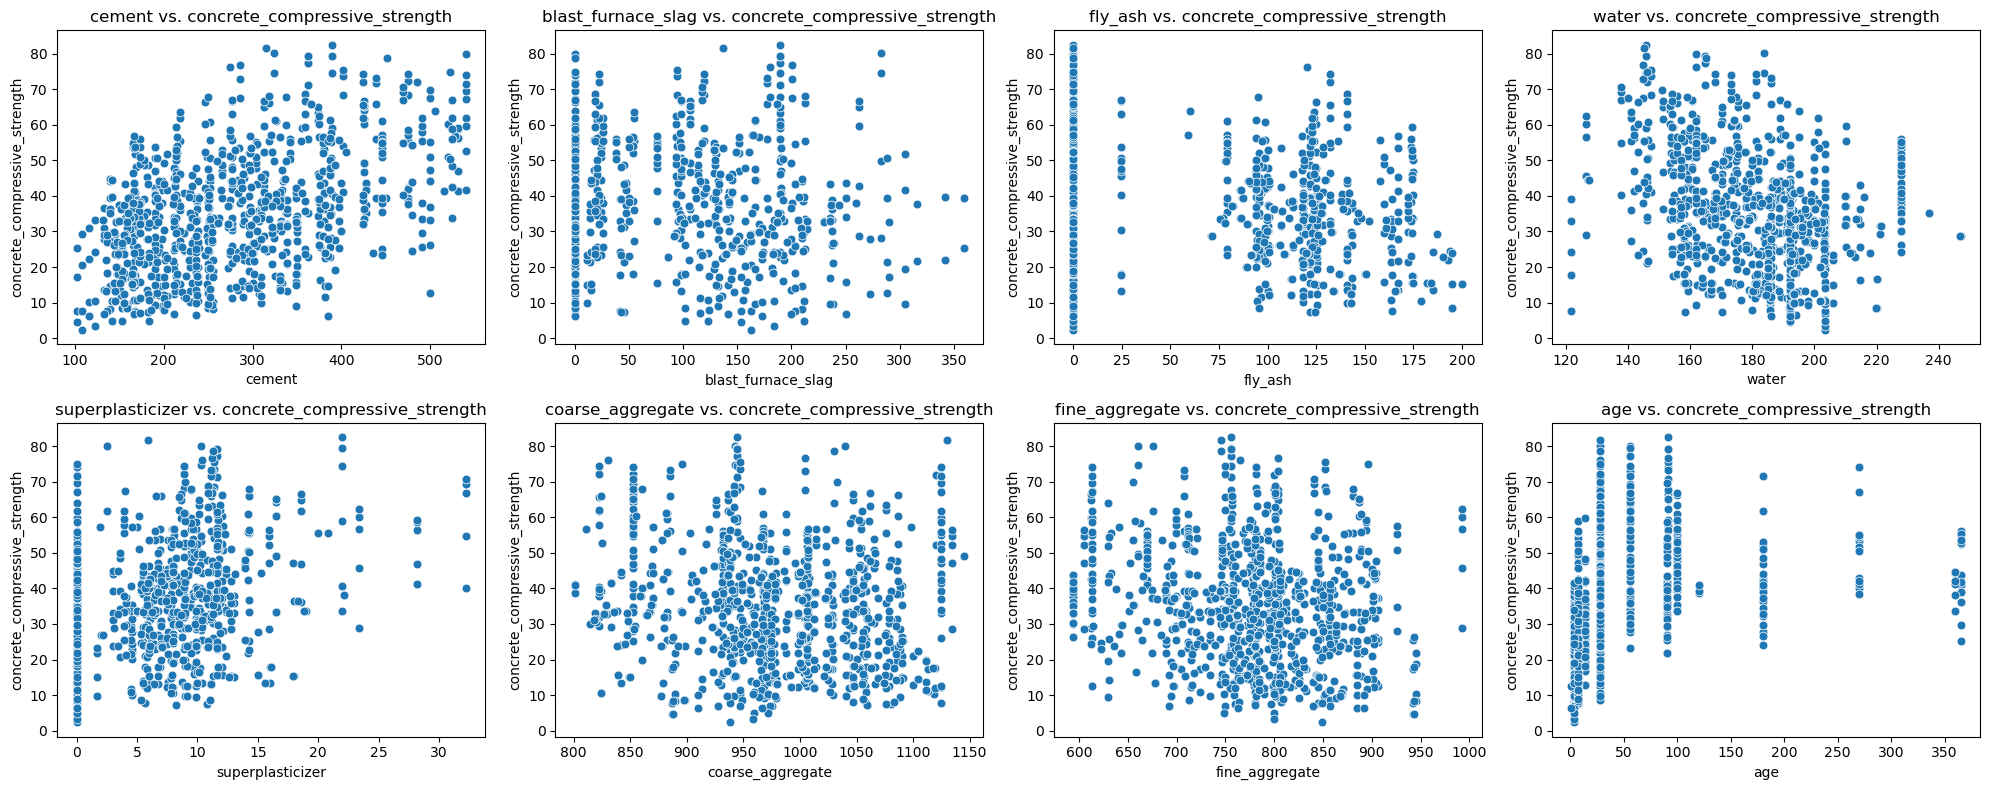

In [23]:
# Define features and target
features = df.columns[:-1]
target = df.columns[-1]

# Define grid size
n_features = len(features)
n_cols = 4
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# Create scatterplots
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i], edgecolor='w', s=40)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs. {target}')

plt.tight_layout()
plt.show()

There appear to be weak positive relationships between compressive strength and cement, age, and superplasticizer.  This gives me some hope that machine learning is possible.

5. **Modeling and Validation**
   - Choose and develop appropriate models (statistical, machine learning, or simulation-based).
   - Evaluate model assumptions, perform rigorous validation (e.g., cross-validation), and diagnose performance.

We need to consider regression algorithms which are amenable to pencil-and-paper calculation. The simplest model would be a linear regression model.  If the target has a non-linear relationship to the predictors an additive model could still give us pencil-and-paper computable results using lookup tables.

We first divide the data into a training set and a test set. The test set remains untouched throughout model selection and tuning, and is used only at the end to evaluate how well the final model generalizes to entirely unseen data.

We will evaluate several models using 5-fold cross-validation:
* Split the training data into 5 equal parts (folds).
* For each model, train it 5 times, each time using 4 folds for training and the remaining fold for validation.
* Calculate the root mean squared error (RMSE) on each validation fold.

We will select the model with the lowest average RMSE across the folds, indicating the best generalization performance.

NOTE:  In this introduction we are only training two models, and we are not iterating.  In practice you would also want to do nested cross validation for hyperparameter tuning (for the smoothing parameter of the GAM), test several other models, try some more feature engineering (e.g. concrete-to-water ratio), etc.

In [24]:
from sklearn.model_selection import train_test_split

# This line splits the original DataFrame "df" into two parts:
# - df_train (used to train the model)
# - df_test (used to test how well the model performs on unseen data)

# The split is done randomly, but:
# - "shuffle=True" makes sure the rows are shuffled before splitting (important if the data has any order).
# - "random_state=216" sets the random seed so the shuffle is reproducible.
# - "test_size=0.2" means 20% of the data will go into df_test, and the remaining 80% into df_train.
df_train, df_test = train_test_split(df, shuffle=True, random_state=216, test_size=.2)

In [25]:
# Cross-validation splitter:
# KFold divides your dataset into K disjoint “folds”.
# You train on K-1 folds and validate on the remaining fold, repeating K times.
# Use shuffle=True and a fixed random_state for reproducible splits.
from sklearn.model_selection import KFold

# Evaluation metric:
# root_mean_squared_error (RMSE) measures typical prediction error size.
# It is in the same units as your target. Lower is better.
# RMSE is sensitive to outliers because it squares errors.
from sklearn.metrics import root_mean_squared_error

# Baseline linear model:
# LinearRegression fits a straight-line relationship (ordinary least squares).
# Good simple baseline.
from sklearn.linear_model import LinearRegression


# Hacky solution to a dependency problem for pyGAM https://github.com/dswah/pyGAM/issues/357 
import scipy.sparse

def to_array(self):
    return self.toarray()

scipy.sparse.spmatrix.A = property(to_array)

# Generalized Additive Model (GAM):
# LinearGAM fits y ≈ sum_j f_j(x_j), where each f_j is a smooth curve.
from pygam import LinearGAM, s


kf = KFold(n_splits=5, shuffle=True, random_state=42)

#array for holding validation scores.  First column will be for linear model, second for GAM.
rmse_scores = np.full((5, 2), np.nan)

X = df_train[features]
y = df_train[target]

for i, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Re-initialize a new GAM each time
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    linear_pred = linear.predict(X_val)
    linear_rmse = root_mean_squared_error(y_val, linear_pred)
    rmse_scores[i,0] = linear_rmse

    gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), lam = 100)
    gam.fit(X_train, y_train)    
    gam_pred = gam.predict(X_val)
    gam_rmse = root_mean_squared_error(y_val, gam_pred)
    rmse_scores[i,1] = gam_rmse

print(f'RMSEs on each fold: \n {np.round(rmse_scores,2)}')
print(f'Mean RMSE: {np.round(np.mean(rmse_scores, axis = 0),2)}')
print(f'Standard deviation: {np.round(np.std(rmse_scores, axis = 0),2)}')


RMSEs on each fold: 
 [[ 9.92  5.79]
 [10.06  6.21]
 [11.2   7.36]
 [10.32  6.77]
 [10.76  7.08]]
Mean RMSE: [10.45  6.64]
Standard deviation: [0.47 0.57]


Of the two models we considered, the GAM was better able to generalize to unseen data.  So we will use it for our final model.

In [26]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), lam = 100).fit(df_train[features], df_train[target])

Now that we have trained our final model, let's perform a final sanity check that it performs similarly on the test data as compared to in cross-validation.

In [27]:
root_mean_squared_error(df_test[target], gam.predict(df_test[features]))

6.338012725268019

In [28]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     32.1408
Link Function:                     IdentityLink Log Likelihood:                                 -3825.3469
Number of Samples:                          824 AIC:                                             7716.9753
                                                AICc:                                            7719.8403
                                                GCV:                                               44.0029
                                                Scale:                                             40.9246
                                                Pseudo R-Squared:                                    0.856
Feature Function                  Lam

/var/folders/14/6_njfgsd63b_nr13v4mq3fb00000gn/T/ipykernel_31065/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


We can visualize the additive impact of each feature by making partial dependence plots: 

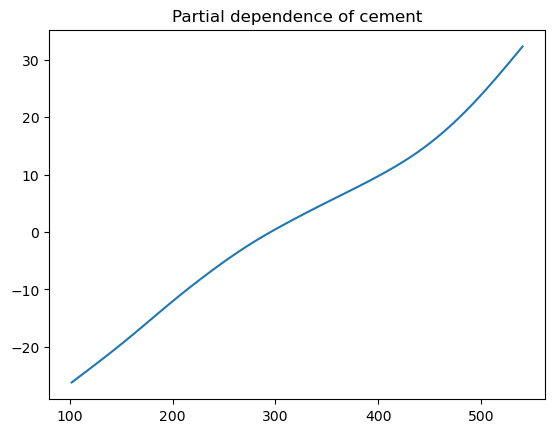

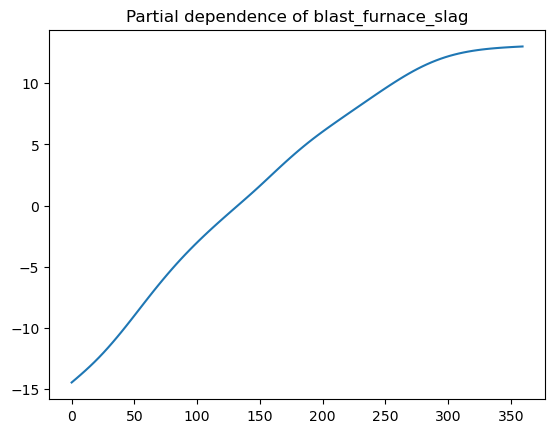

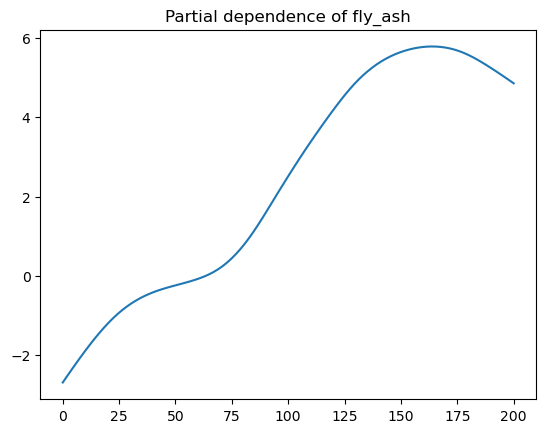

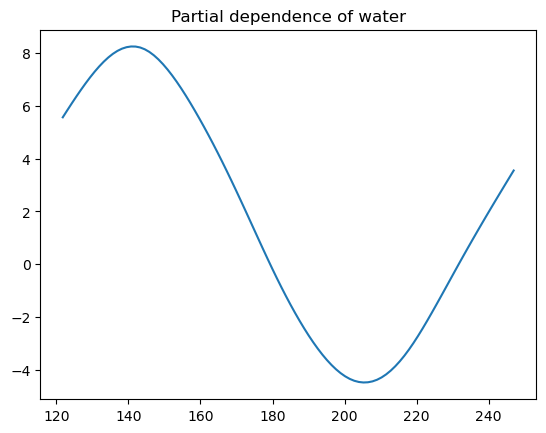

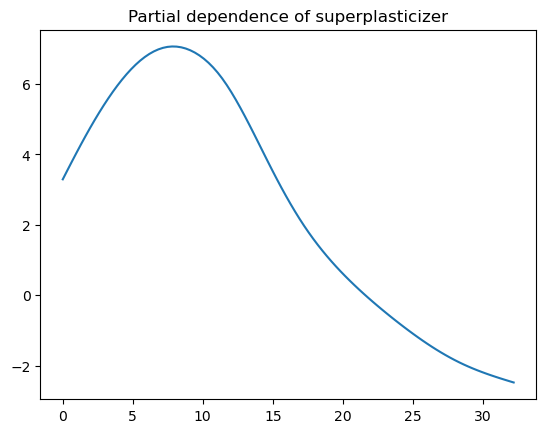

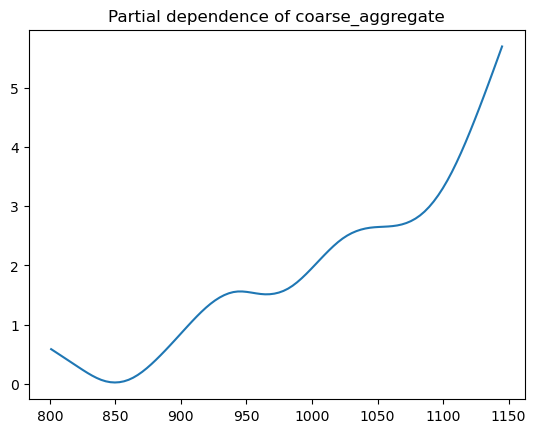

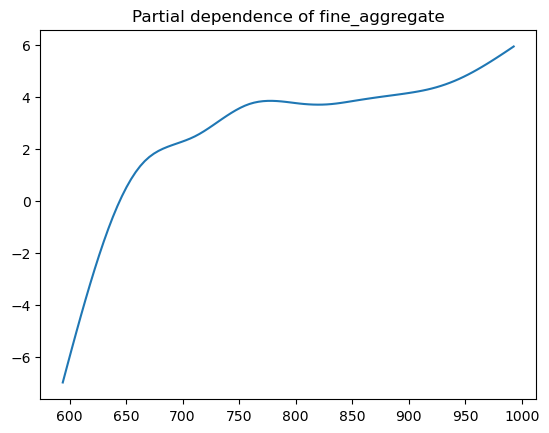

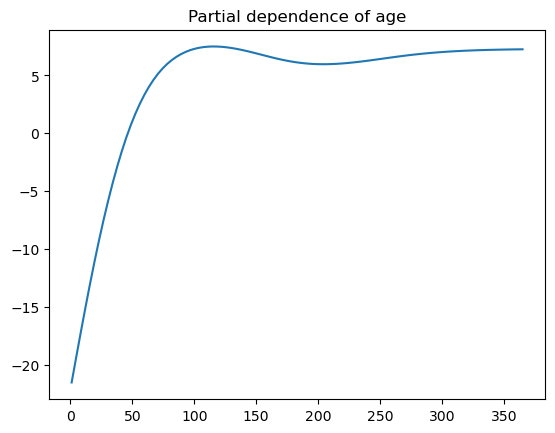

In [29]:
feature_indices = {name: i for i, name in enumerate(features)}

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.figure()
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial dependence of {features[i]}')
    plt.show()

These PDPs give us some insights which would have been impossible to obtain from linear models or from black-box models like XGBoost.  According to our model a given batch of concrete should gain about ~25 MPa of strength over the first ~100 days, but then stay at a constant strength after that.  It is really interesting that we are able to reach this conclusion *without* repeatedly measuring the same batch over time.  

I will now save these as lookup tables.

In [30]:
import numpy as np
import pandas as pd
from pathlib import Path

out_dir = Path("gam_lookup_tables")
out_dir.mkdir(exist_ok=True)

def lower_strict_multiple(xmin, step):
    # largest multiple strictly less than xmin
    return step * np.floor((xmin - 1e-12) / step)

def upper_strict_multiple(xmax, step):
    # smallest multiple strictly greater than xmax
    return step * np.ceil((xmax + 1e-12) / step)

# 1) Build a stable reference point (median of training X)
X_df = pd.DataFrame(X_train, columns=features)
x_ref = X_df.median(axis=0).to_numpy().reshape(1, -1)

# 2) Intercept consistent with partial dependence decomposition
term_contrib_ref = []
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    c = float(gam.partial_dependence(term=i, X=x_ref)[0])
    term_contrib_ref.append(c)

pred_ref = float(gam.predict(x_ref)[0])
intercept_for_tables = pred_ref - sum(term_contrib_ref)

with open(out_dir / "INTERCEPT.txt", "w") as f:
    f.write(f"{intercept_for_tables:.6f}\n")

# 3) Export one CSV per feature on requested grids
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    name = features[i]
    step = 1.0 if name == 'superplasticizer' else 10.0

    col = X_df[name].to_numpy(dtype=float)
    xmin, xmax = np.nanmin(col), np.nanmax(col)

    lo = lower_strict_multiple(xmin, step)
    hi = upper_strict_multiple(xmax, step)

    grid = np.arange(lo, hi + step, step, dtype=float)


    # Build evaluation matrix: vary only column i along 'grid', others fixed at x_ref
    XX = np.repeat(x_ref, len(grid), axis=0)
    XX[:, i] = grid

    contrib = gam.partial_dependence(term=i, X=XX)

    tab = pd.DataFrame({name: grid, "contribution": contrib})
    tab.to_csv(out_dir / f"{name}_lookup.csv", index=False)

print(f"Wrote INTERCEPT.txt and {len(features)} CSVs to {out_dir.resolve()}")


Wrote INTERCEPT.txt and 8 CSVs to /Users/stevengubkin/Desktop/data-science-fall-2025/lectures/01_supervised_learning/gam_lookup_tables


In [31]:
lookup_tables = {feature: pd.read_csv(f'gam_lookup_tables/{feature}_lookup.csv') for feature in features}    

Let's see how these tables could be used.

In [32]:
# These are the features for entry 21.
rounded_features = (df.iloc[21]/10).round(0)*10
rounded_features

cement                            140.0
blast_furnace_slag                210.0
fly_ash                             0.0
water                             190.0
superplasticizer                    0.0
coarse_aggregate                 1050.0
fine_aggregate                    810.0
age                                30.0
concrete_compressive_strength      30.0
Name: 21, dtype: float64

In [33]:
# This is the intercept of the model
intercept_for_tables

42.30498937163472

In [34]:
# An example lookup table:
lookup_tables['age']

,age,contribution
0,0.0,-22.138798
1,10.0,-16.275182
2,20.0,-10.815848
3,30.0,-6.041402
4,40.0,-2.074453
5,50.0,1.047960
6,60.0,3.380056
7,70.0,5.042880
8,80.0,6.164401
9,90.0,6.877888


In [35]:
#The additive contributions of each individual feature to compressive strength for entry 21.
contribs = {feature:lookup_tables[feature][lookup_tables[feature][feature] == rounded_features[feature]].contribution.values[0] for feature in features}
contribs

{'cement': np.float64(-20.983109327491885),
 'blast_furnace_slag': np.float64(6.7759097160042945),
 'fly_ash': np.float64(-2.6886468197763733),
 'water': np.float64(-2.69607267620026),
 'superplasticizer': np.float64(3.290970179002641),
 'coarse_aggregate': np.float64(2.648445498632633),
 'fine_aggregate': np.float64(3.726627828627208),
 'age': np.float64(-6.041401780460533)}

In [36]:
# The prediction of the model
intercept_for_tables + sum(contribs.values())


np.float64(26.337711989972448)

In [37]:
# Double checking that the python model works the same as our "pen and paper" model with the lookup tables.
gam.predict(rounded_features[features].values.reshape(1,-1))

array([26.33771199])

In [38]:
# The actual target value.
df.iloc[21][target]

np.float64(28.24)

--------------------------

This notebook was written for the Erd&#337;s Institute Data Science Boot Camp by Steven Gubkin, 2025.